## **Customer Lifetime Value**

**Created by : Gina Nur Rahmasari**

***

### **Bussiness Understanding**

Asuransi mobil/Auto Insurance adalah kontrak antara pelanggan dan perusahaan asuransi dimana pelanggan membayar sejumlah premi dan sebagai gantinya perusahaan asuransi menjamin proteksi terhadap kerugian finansial akibat kecelakaan ataupun pencurian kendaraan, yang kemudian dapat di-klaim oleh pelanggan. Saya asumsikan data ini merupakan data perusahaan asuransi di Amerika Serikat/USA karena sebagian besar negara bagian di USA mewajibkan penduduknya untuk memiliki Basic Auto Insurance. Seorang pelanggan asuransi dapat memilih polis atau menentukan sendiri isi kontrak mengenai coverage atau kerusakan apa saja yang ditanggung oleh perusahaan asuransi sesuai dengan kebutuhan dan anggaran yang dimiliki, dan hal ini akan berpengaruh pada jumlah premi yang harus dibayarkan. 

Perusahaan asuransi memperoleh pendapatan dari polis asuransi/premi yang dibayarkan pelanggan, serta dari aktivitas investasi yang dilakukan. Meskipun tidak seluruhnya, akan ada sekian persen pelanggan yang membuat klaim yang harus dibayarkan oleh perusahaan sesuai polis. Untuk memperbesar margin keuntungan, perusahaan asuransi akan berusaha meningkatkan jumlah premi yang diperoleh karena kita tidak bisa mengatur jumlah klaim yang dilakukan pelanggan. Peningkatan penjualan premi dapat dilakukan dengan menentukan strategi marketing yang tepat sasaran. 

Terdapat dua fokus dalam kegiatan marketing yaitu mencari pelanggan baru (akuisisi) dan mempertahankan pelanggan lama (retensi). Menurut penelitian yang dilakukan oleh [Invesp](https://www.invespcro.com/blog/customer-acquisition-retention/), akuisisi pelanggan memerlukan biaya 5 kali lebih besar dibanding retensi pelanggan. Selain itu, keuntungan yang dapat diperoleh dengan mempertahankan pelanggan lama juga lebih besar karena pelanggan lama cenderung memiliki daya beli yang lebih tinggi dibanding pelanggan baru. 

#### **Problem Statement**

Sebuah perusahaan Auto Insurance ingin menaikkan revenue perusahaan dengan melakukan kegiatan marketing yang berfokus pada customer retention atau mempertahankan pelanggan. Agar kegiatan marketing yang dilakukan tepat sasaran, kita perlu melakukan penawaran/promosi kepada orang yang tepat. Kita dapat melakukannya dengan bantuan Customer Lifetime Value atau CLV. CLV menggambarkan ukuran pendapatan total yang diharapkan bisa diperoleh perusahaan dari seseorang selama ia menjadi pelanggan. Secara matematis CLV dapat dihitung dengan mengalikan rata-rata nilai pembelian, frekuensi pembelian, dan rata-rata retensi pelanggan yang diukur dalam tahun. Dengan mengetahui faktor apa saja yang berpengaruh terhadap CLV, misalnya karakteristik pelanggan atau jenis layanan asuransi, perusahaan dapat menentukan strategi marketing seperti apa yang dapat diterapkan.

#### **Goals**

Berdasarkan permasalahan tersebut, akan dibuat model machine learning yang dapat memprediksi nilai CLV berdasarkan data profil pelanggan dan layanan asuransi yang dipilih. Nilai CLV yang diperoleh akan menjadi referensi bagi perusahaan asuransi dalam menentukan tipe promosi yang tepat bagi setiap pelanggan untuk meningkatkan transaksi yang dilakukan oleh pelanggan. Hal ini diharapkan dapat mengoptimalkan biaya marketing dan meningkatkan revenue perusahaan.

#### **Analytic Approach**

Sebelum membuat model, akan dilakukan analisis berdasarkan domain knowledge dan pendekatan statistik untuk menemukan pola dari fitur-fitur yang ada, yang kemungkinan berpengaruh terhadap nilai CLV yang dimiliki pelanggan. Kemudian akan dibuat berbagai model regresi untuk memprediksi nilai CLV, dan akhirnya model terbaik akan dipilih dari model yang memiliki nilai evaluation metrics terbaik dan digunakan sebagai final model.

#### **Metric Evaluation**

Evaluation metrics sangat penting dalam pemodelan karena dapat membantu kita memahami kinerja model dan memudahkan untuk menginterpretasikan model. Kinerja model regresi dapat diketahui dengan mengetahui tingkat error prediksi yang dibuat oleh model tersebut. Model regresi yang baik adalah model yang perbedaan antara nilai aktual dan nilai prediksinya kecil. 

Evaluation metrics yang akan digunakan dalam pemodelan ini adalah:
1. MAE (Mean Absolute Error) : MAE diperoleh dengan cara menghitung nilai rata-rata dari nilai absolute residual (selisih nilai prediksi dan nilai aktual). Semakin kecil nilai MAE, artinya semakin baik pula kinerja model. Kita menggunakan metrics ini karena MAE dapat bekerja dengan baik saat dataset memiliki banyak outlier.
2. RMSE (Root Mean Squared Error): RMSE dihitung dengan meng-akarkuadrat-kan nilai MSE yaitu rata-rata dari kuadrat residual (selisih nilai prediksi dan nilai aktual). Dibandingkan dengan MAE, RMSE akan memberi bobot lebih tinggi pada error sehingga menghasilkan nilai yang lebih besar dibanding MAE. Sama seperti MAE, kita menginginkan nilai RMSE yang sekecil mungkin. Kita menggunakan metrics ini karena rentang nilai dari Y pada dataset ini tidak terlalu besar (berkisar antara ribuan hingga puluhan ribu).
3. R squared : R-Square menjelaskan seberapa besar variasi nilai Y yang dapat dijelaskan oleh model. Nilainya biasanya berkisar antara 0-1, semakin mendekati 1 artinya model semakin baik. Metrics ini digunakan karena lebih mudah dipahami saat menginterpretasikan kinerja model kepada orang lain.


### **Data Understanding**

- Dataset merupakan data nilai CLV, profil pelanggan dan layanan asuransi yang dipilih dari sebuah perusahaan asuransi mobil.
- Dataset memiliki 11 kolom dan 5669 baris.

**Dataset Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Jenis/tipe mobil |
| Coverage | Object | Jenis proteksi/manfaat asuransi yang dipilih |
| Renew Offer Type | Object | Tipe pembaruan asuransi yang dipilih saat periode polis berakhir |
| EmploymentStatus | Object | Status pekerjaan |
| Marital Status | Object | Status pernikahan |
| Education | Object | Tingkat pendidikan terakhir |
| Number of Policies | Float | Jumlah polis yang diambil |
| Monthly Premium Auto | Float | Jumlah premi yang dibayarkan setiap bulan (USD) |
| Total Claim Amount | Float | Total klaim yang telah dibayarkan asuransi kepada pelanggan (USD) |
| Income | Float | Pendapatan pelanggan |
| Customer Lifetime Value | Float | Nilai CLV pelanggan |


<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset

# Pengolahan data
import pandas as pd 
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset

df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


#### **Exploratory Data Analysis**

**CLV - Target variable**

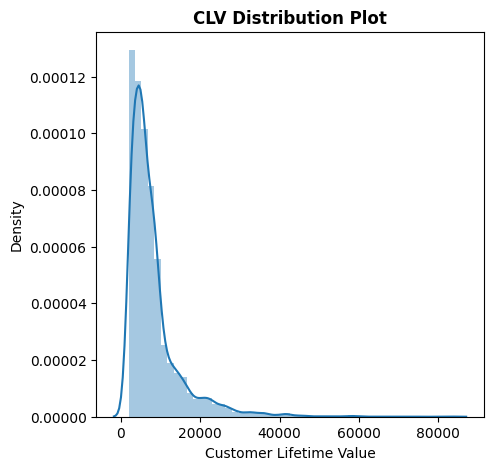

In [4]:
plt.figure(figsize=(5, 5))
sns.distplot(df['Customer Lifetime Value'])
plt.title('CLV Distribution Plot', size=12, weight='bold');

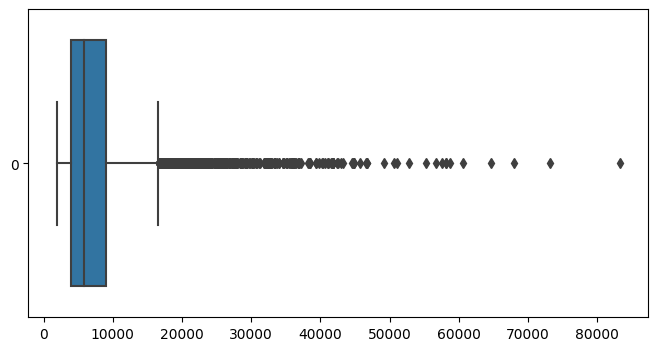

In [5]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['Customer Lifetime Value'], orient='h')
plt.show()

In [6]:
df[['Customer Lifetime Value']].describe()

,Customer Lifetime Value
count,5669.000000
mean,8029.874592
std,6916.708246
min,1898.007675
25%,3954.344534
50%,5800.188903
75%,9031.214859
max,83325.381190


Berdasarkan plot distribusi dan boxplot dapat dilihat bahwa:
- Nilai CLV memiliki distribusi tidak normal dengan skewness positif/right-skewed distribution. 
- Terlihat juga bahwa variabel CLV memiliki banyak outlier. Namun karena variabel CLV merupakan variabel target/yang akan diprediksi maka outlier ini tidak akan dihilangkan.
- CLV memiliki range data dari USD 1898.01 - 83325.38, dengan mean USD 8059.48 yang nilainya lebih besar dibanding mediannya USD 5837.53 (mengindikasikan right-skewed distribution).

**Pola Hubungan antara CLV dan Variabel Numerik**

Text(0.5, 1.0, 'Hubungan antara Total Claim Amount dan CLV')

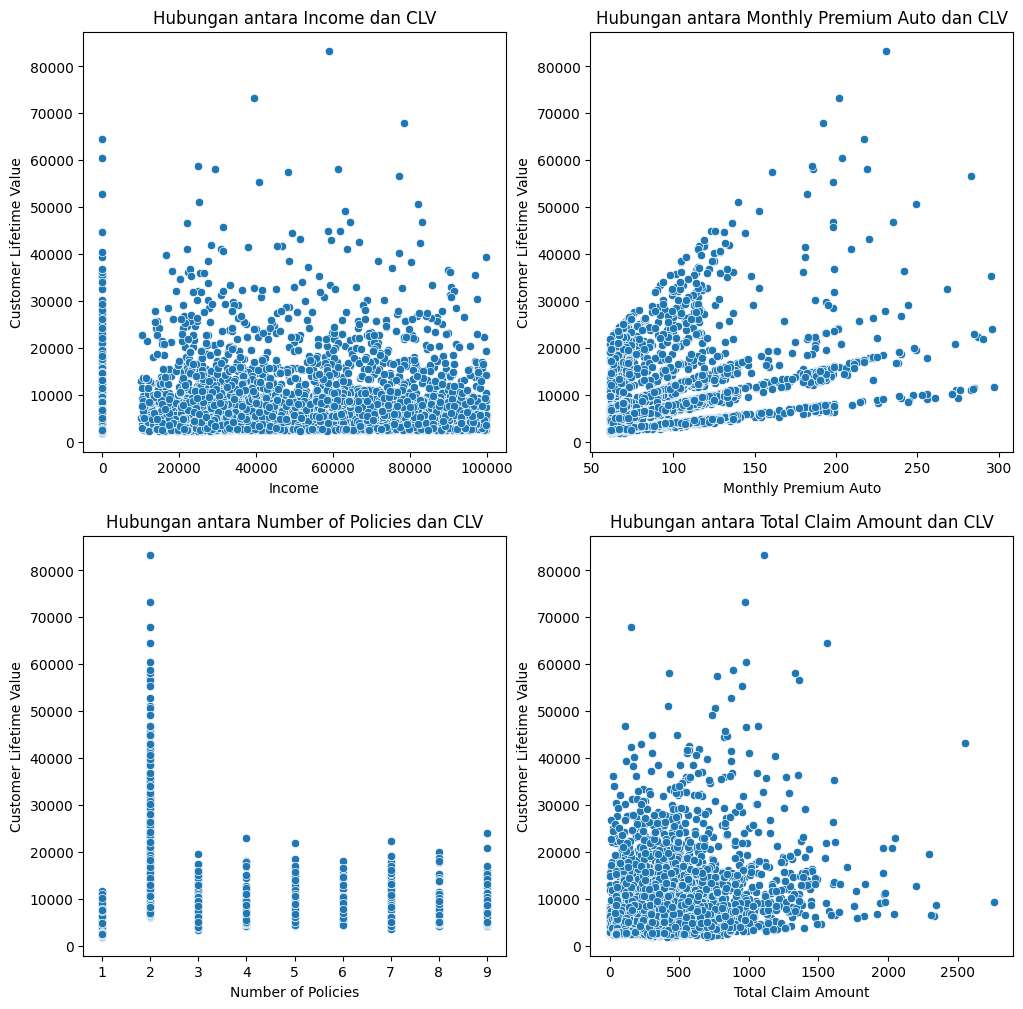

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Income'], ax=axes[0,0]).set_title('Hubungan antara Income dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Monthly Premium Auto'], ax=axes[0,1]).set_title('Hubungan antara Monthly Premium Auto dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Number of Policies'], ax=axes[1,0]).set_title('Hubungan antara Number of Policies dan CLV')
sns.scatterplot(y=df['Customer Lifetime Value'], x=df['Total Claim Amount'], ax=axes[1,1]).set_title('Hubungan antara Total Claim Amount dan CLV')

Dari visualisasi diatas, secara sekilas dapat terlihat bahwa CLV tidak memiliki hubungan yang linear dengan variabel numerik lainnya. 

- Pada variabel Income, semakin tinggi Income pelanggan tidak berarti bahwa pelanggan akan melakukan spending yang lebih tinggi pula. Terlihat dari nilai CLV yang berkumpul di bagian bawah sumbu y yang merata di sepanjang sumbu x.
- Untuk variabel Monthly Premium Auto hubungan dengan nilai CLV terlihat cenderung linear dimana pada jumlah premi yang kecil nilai CLV berkumpul di sekitar angka < 30000 dan nilai CLV yang lebih tinggi juga dimiliki oleh jumlah premi yang lebih tinggi. Tetapi banyak juga terdapat data nilai CLV yang rendah meskipun jumlah premi-nya tinggi.
- Untuk variabel Total Claim Amount idealnya memiliki hubungan yang linear dengan CLV agar pendapatan perusahaan lebih seimbang. Bila banyak pelanggan yang total spending/nilai CLV nya rendah namun memiliki Total Claim yang tinggi tentu akan menjadi kerugian bagi perusahaan. Berdasarkan visualisasi diatas, mayoritas Total Claim terletak pada angka yang cukup rendah dan memiliki nilai CLV yang rendah pula. Meskipun terdapat beberapa data dimana pelanggan dengan nilai CLV yang rendah namun memiliki Total Claim yang tinggi. 
- Sementara untuk Number of Policies atau jumlah polis yang dimiliki pelanggan juga tidak memiliki hubungan linear dengan nilai CLV. Secara logika semakin banyak polis yang dimiliki pelanggan maka premi yang dibayarkan dan nilai CLV nya juga semakin tinggi, namun pelanggan dengan nilai CLV yang tinggi banyak dimiliki oleh pelanggan dengan jumlah polis sebanyak 2 polis. 

**Plot Distribusi Variabel Numerik**

In [8]:
num_cols = df.select_dtypes(include='float64')
num_cols.drop('Customer Lifetime Value',axis=1).describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
count,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569
std,2.393187,34.551795,287.558038,30490.490723
min,1.000000,61.000000,0.423310,0.000000
25%,1.000000,68.000000,266.932542,0.000000
50%,2.000000,82.000000,379.200000,34322.000000
75%,4.000000,109.000000,549.986128,62464.000000
max,9.000000,297.000000,2759.794354,99934.000000


<AxesSubplot: xlabel='Number of Policies', ylabel='Density'>

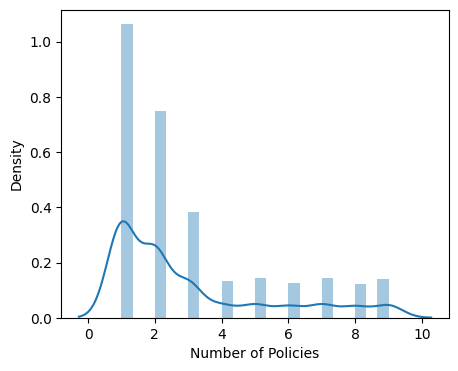

In [9]:
plt.figure(figsize=(5,4))
sns.distplot(df['Number of Policies'])

<AxesSubplot: xlabel='Income', ylabel='Density'>

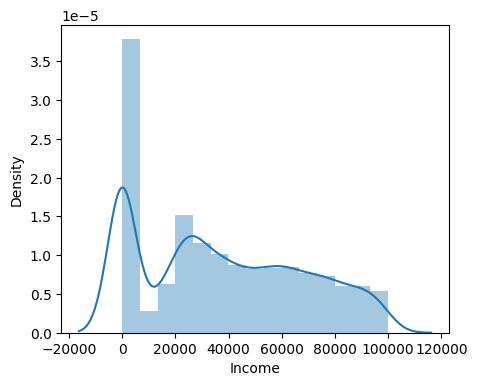

In [10]:
plt.figure(figsize=(5,4))
sns.distplot(df['Income'])

<AxesSubplot: xlabel='Monthly Premium Auto', ylabel='Density'>

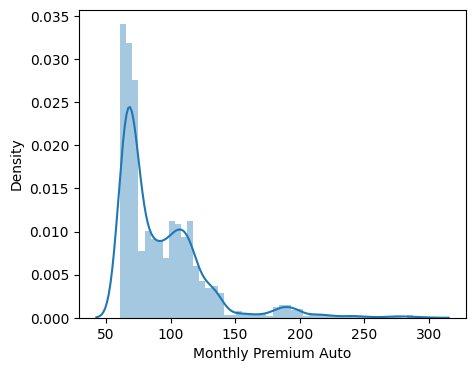

In [11]:
plt.figure(figsize=(5,4))
sns.distplot(df['Monthly Premium Auto'])

<AxesSubplot: xlabel='Total Claim Amount', ylabel='Density'>

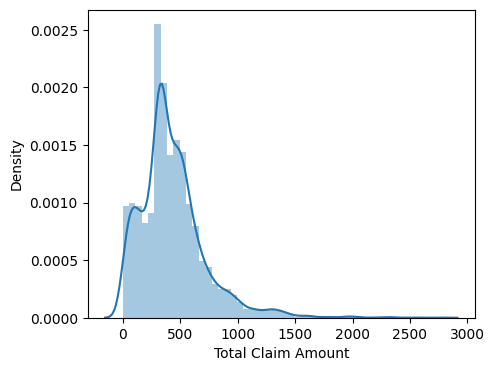

In [12]:
plt.figure(figsize=(5,4))
sns.distplot(df['Total Claim Amount'])

Berdasarkan visualisasi diatas dapat kita lihat bahwa:
- Keempat variabel numerik memiliki distribusi tidak normal/right-skewed distribution.
- Fitur Number of Policies memiliki range antara 1 - 9.
- Fitur Monthly Premium Auto memiliki range antara USD 61 - USD 297.
- Fitur Income memiliki range antara USD 0 - USD 99934.0
- Fitur Total Claim Amount memiliki range antara USD 0.42 - USD 2759.79.
- Range ini akan menjadi limitasi saat interpretasi model nantinya.


**Pola Hubungan antara CLV dan Variabel Kategorikal**

<AxesSubplot: xlabel='Education', ylabel='Customer Lifetime Value'>

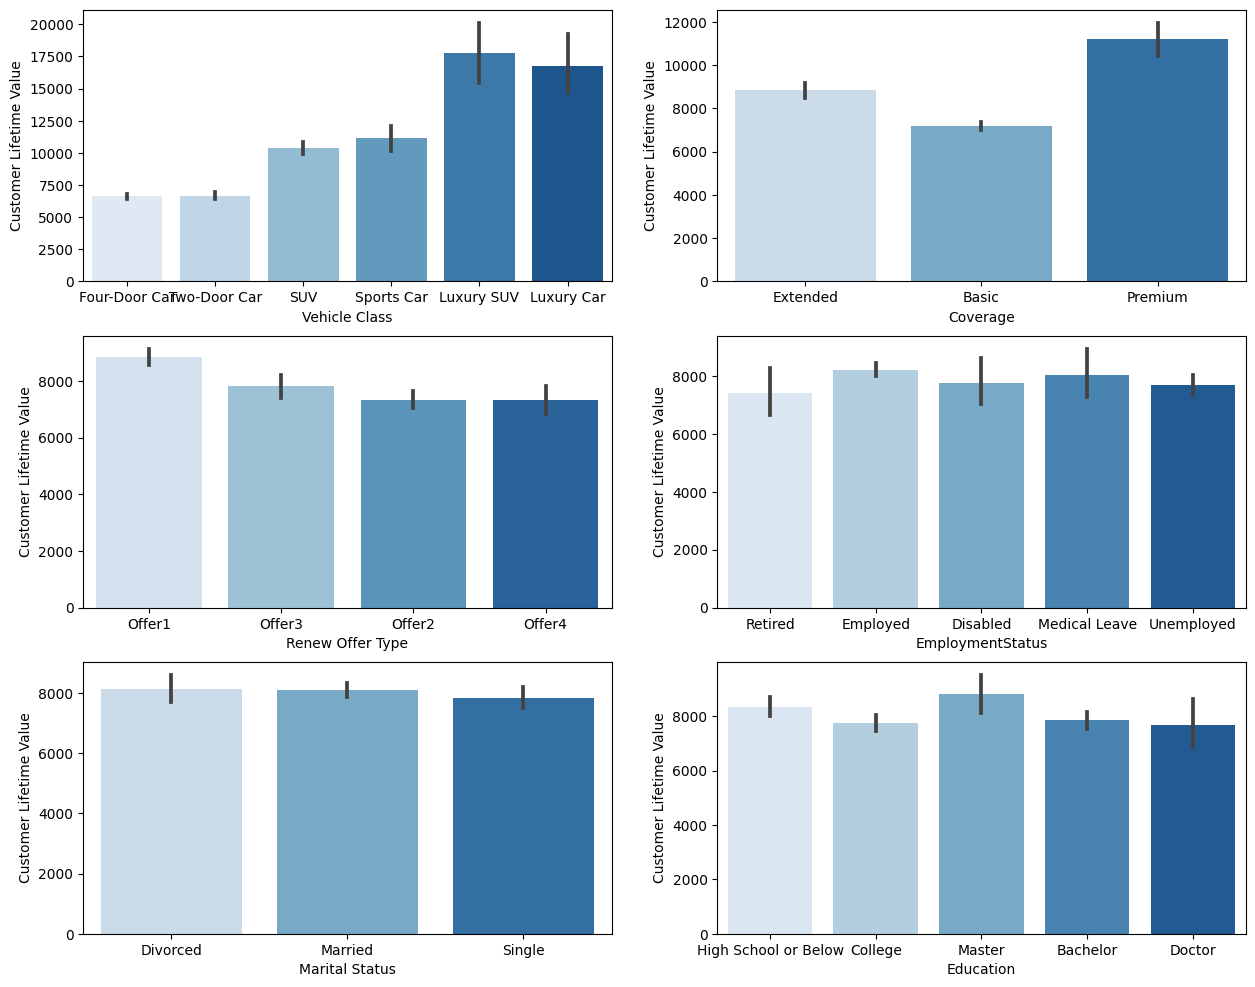

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15,12))

sns.barplot(x=df['Vehicle Class'], y=df['Customer Lifetime Value'], ax=axes[0,0], palette='Blues')
sns.barplot(x=df['Coverage'], y=df['Customer Lifetime Value'], ax=axes[0,1], palette='Blues')
sns.barplot(x=df['Renew Offer Type'], y=df['Customer Lifetime Value'], ax=axes[1,0], palette='Blues')
sns.barplot(x=df['EmploymentStatus'], y=df['Customer Lifetime Value'], ax=axes[1,1], palette='Blues')
sns.barplot(x=df['Marital Status'], y=df['Customer Lifetime Value'], ax=axes[2,0], palette='Blues')
sns.barplot(x=df['Education'], y=df['Customer Lifetime Value'], ax=axes[2,1], palette='Blues')

In [14]:
cat_cols = df.select_dtypes(include='object')

cat_cols.describe()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dari visualisasi di atas secara sekilas dapat dilihat bahwa jenis mobil dan layanan asuransi yang dipilih pelanggan cukup memiliki pengaruh terhadap nilai CLV pelanggan. 

- Pelanggan yang memiliki jenis mobil Luxury SUV dan Luxury Car cenderung berkontribusi pada nilai CLV yang tinggi sesuai jenis mobilnya yang tergolong mewah dibanding jenis mobil lainnya. Meskipun mayoritas pelanggan memiliki jenis kendaraan Four-Door Car. Sehingga dapat diasumsikan bahwa jumlah premi atau Monthly Premium Auto yang dibayarkan dipengaruhi oleh jenis mobil dan nilainya lebih tinggi pada kendaraan mewah/luxury. Hal ini juga berarti bahwa perusahaan mendapat pendapatan lebih banyak dari pelanggan yang memiliki jenis kendaraan Luxury SUV dan Luxury Car meskipun jumlah pelanggannya lebih sedikit.
- Dari segi jenis layanan asuransi, pelanggan yang memilih Premium Coverage memiliki nilai CLV yang lebih tinggi. Diasumsikan bahwa semakin banyak proteksi/benefit yang ditawarkan oleh asuransi Premium Coverage berarti jumlah premi yang harus dibayarkan dan nilai CLV juga lebih tinggi. Meskipun mayoritas pelanggan memiliki jenis Coverage Basic namun layanan Premium Coverage berkontribusi lebih besar terhadap nilai CLV pelanggan dan terhadap pendapatan perusahaan. 
- Untuk fitur Renew Offer Type nilai CLV tertinggi dimiliki oleh pelanggan yang memilih Offer 1, dan Tipe Offer1 juga merupakan Renew Offer Type yang paling banyak dimiliki pelanggan. Namun kita tidak mengetahui perbedaan antara masing-masing Offer Type karena tidak dijelaskan didalam dataset. Untuk itu saya asumsikan fitur ini kurang relevan digunakan dalam model karena kita tidak dapat memperoleh informasi apapun mengenai Renew Offer Type ini.
- Dari segi profil pelanggan tidak terlalu berpengaruh terhadap nilai CLV dimana perbedaan antar variabelnya tidak terlalu jauh. Untuk fitur EmploymentStatus nilai CLV tertinggi dimiliki oleh pelanggan yang bekerja/employed. Untuk fitur Marital Status nilai CLV tertinggi dimiliki oleh pelanggan yang berstatus Divorced baru kemudian Married. Untuk fitur Education nilai CLV tertinggi dimiliki oleh pelanggan dengan tingkat pendidikan terakhir Master. Sementara jumlah pelanggan paling banyak adalah yang berstatus Employed, Married, dan memiliki tingkat pendidikan Bachelor (tidak saling berhubungan).

**Correlation Matrix**

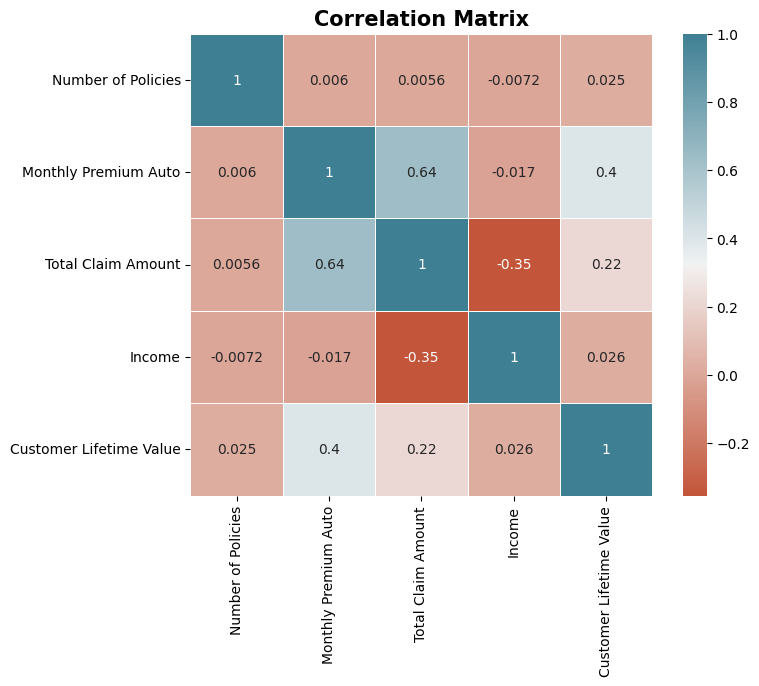

In [15]:
plt.figure(figsize=(8,6))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Berdasarkan correlation matrix diatas dapat terlihat bahwa nilai CLV memiliki korelasi paling kuat dengan fitur Monthly Premium Auto, sesuai dengan hasil visualisasi di awal yang menggambarkan pola yang cenderung linear antara CLV dan Monthly Premium Auto. Sedangkan untuk fitur Number of Policies, Total Claim Amount, dan Income korelasinya tidak begitu kuat (nilai korelasi mendekati 0).

### **Data Preprocessing**

In [16]:
# Membuat backup data

df_model = df.copy()

Seperti yang kita ketahui, kualitas model machine learning akan sangat dipengaruhi oleh kualitas data yang kita gunakan. Bekerja dengan data yang tidak bersih dapat menyebabkan model Machine Learning (ML) memiliki performa yang buruk. Untuk itu sebelum data digunakan perlu dilakukan data cleaning, yaitu pengecekan terhadap dataset untuk menemukan adanya data yang tidak lengkap, salah, ataupun tidak relevan untuk kemudian mengganti, memodifikasi, atau menghapus data kotor tersebut.

**Drop Column**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, kita bisa menggunakan domain knowledge untuk menentukan fitur mana saja yang tidak memiliki relevansi terhadap model.

- Fitur Renew Offer Type dinilai kurang relevan untuk digunakan dalam modelling karena kita tidak mendapat informasi mengenai perbedaan tiap Offer sehingga akan kekurangan informasi dalam menginterpretasikannya.

In [17]:
# Drop kolom yang tidak relevan
df_model.drop(['Renew Offer Type'], axis=1, inplace=True)

**Duplicates**

In [18]:
# Mengecek keberadaan data duplikat

df_model[df.duplicated()]

,Vehicle Class,Coverage,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720
...,...,...,...,...,...,...,...,...,...,...
5624,Luxury SUV,Premium,Retired,Married,Bachelor,1.0,271.0,1300.800000,14290.0,10179.717040
5640,SUV,Extended,Unemployed,Married,College,1.0,122.0,725.870693,0.0,4270.034394
5642,Four-Door Car,Extended,Employed,Married,College,1.0,95.0,281.110788,93272.0,3861.486269
5654,Four-Door Car,Extended,Employed,Married,College,8.0,82.0,393.600000,72608.0,6521.368813


Terdapat data duplikat sebanyak 618 baris dari total 5669 baris data. Meskipun jumlahnya cukup banyak namun kita perlu melakukan penghapusan terhadap data duplikat. Data duplikat dapat mengganggu proses data splitting sehingga data training dan testing bisa saja memiliki baris data yang sama, hal ini dapat mengakibatkan information leakage dan bias dalam hasil prediksi. 

In [19]:
# Menghapus data duplikat

df_model.drop_duplicates(inplace=True)

In [20]:
# Mengecek kembali keberadaan data duplikat

df_model.duplicated().sum()

0

In [21]:
df_model.shape

(5051, 10)

Sekarang sudah tidak terdapat duplikat dalam dataset dan jumlah baris data berkurang menjadi 5051 baris.

**Missing Value**

In [22]:
# Mengecek keberadaan missing value

df_model.isnull().sum()

Vehicle Class              0
Coverage                   0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

Dalam dataset ini tidak terdapat missing value sehingga tidak perlu dilakukan perlakuan apapun dan analisis data dapat dilanjutkan.

**Outlier**

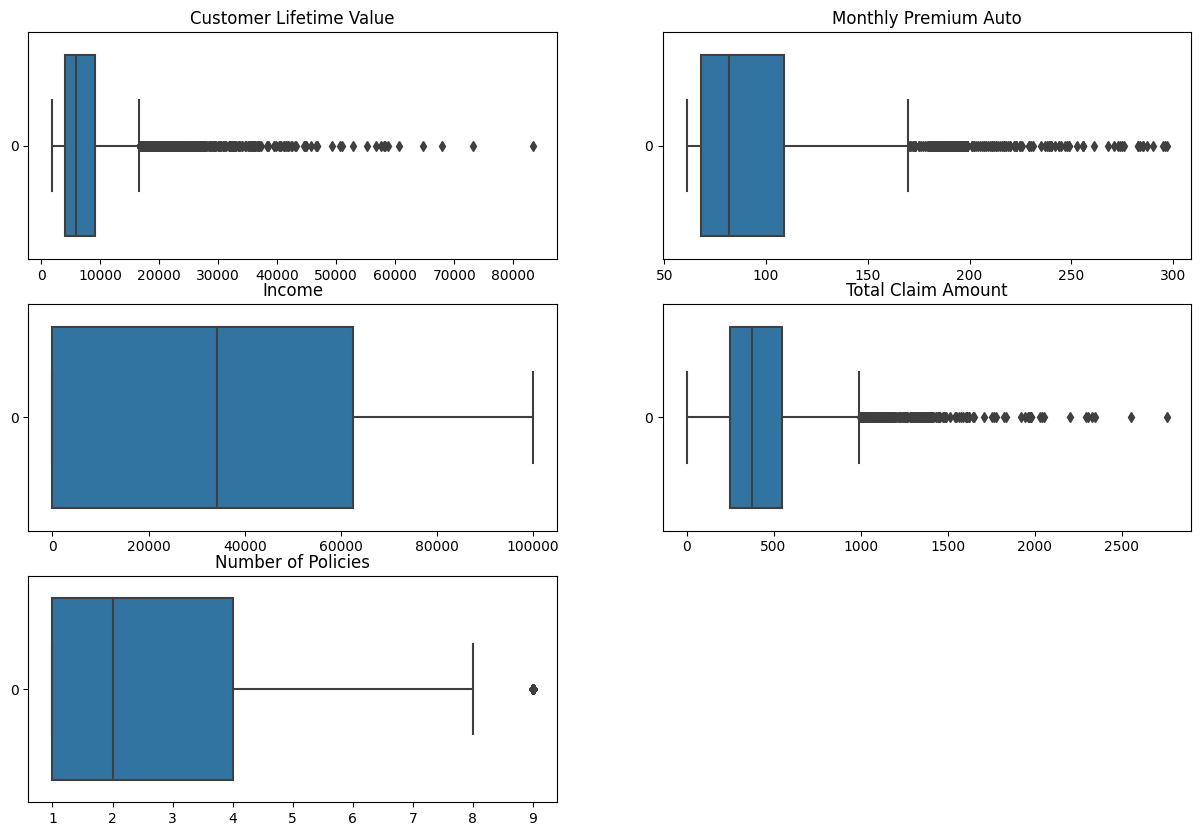

In [23]:
# Mengecek keberadaan outlier pada fitur numerikal

fig, axes = plt.subplots(3, 2, figsize=(15,10))

sns.boxplot(df_model['Customer Lifetime Value'], orient='h', ax = axes[0,0]).set_title('Customer Lifetime Value')
sns.boxplot(df_model['Monthly Premium Auto'], orient='h', ax = axes[0,1]).set_title('Monthly Premium Auto')
sns.boxplot(df_model['Income'], orient='h', ax = axes[1,0]).set_title('Income')
sns.boxplot(df_model['Total Claim Amount'], orient='h', ax = axes[1,1]).set_title('Total Claim Amount')
sns.boxplot(df_model['Number of Policies'], orient='h', ax = axes[2,0]).set_title('Number of Policies')
fig.delaxes(axes[2,1])

Terdapat outlier pada fitur Monthly Premium Auto, Total Claim Amount, dan CLV. Sementara pada fitur Income tidak terdapat outlier, dan pada fitur Number of Policies terdapat 1 titik outlier, namun tidak dilakukan treatment pada fitur ini karena jumlah outliernya sedikit. Selanjutnya mari kita cari tahu jumlah outlier pada masing-masing fitur.

In [24]:
# Membuat fungsi untuk mengecek outliers

def find_outlier(fitur):
    q1 = fitur.quantile(0.25)
    q3 = fitur.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [25]:
# Outliers pada fitur CLV

find_outlier(df_model['Customer Lifetime Value'])

IQR: 5064.1236284999995
limit_bawah: -3631.744438749999
limit_atas: 16624.75007525


In [26]:
# Outliers pada fitur Monthly Premium Auto

find_outlier(df_model['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [27]:
# Outliers pada fitur Total Claim Amount

find_outlier(df_model['Total Claim Amount'])

IQR: 296.34681750000004
limit_bawah: -192.74392225000005
limit_atas: 992.6433477500001


In [28]:
# Menghitung jumlah outlier pada setiap fitur

outlier_CLV = df_model[df_model['Customer Lifetime Value'] > 16624.75007525].count()['Customer Lifetime Value']
outlier_premi = df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']
outlier_claim = df_model[df_model['Total Claim Amount'] > 992.6433477500001].count()['Total Claim Amount']

print('Jumlah outlier pada fitur Customer Lifetime Value:', outlier_CLV, 'atau sebesar', ((outlier_CLV)/(df_model.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada fitur Monthly Premium Auto:', outlier_premi, 'atau sebesar', ((outlier_premi)/(df_model.shape[0])*100).round(2), '% dari keseluruhan data')
print('Jumlah outlier pada fitur Total Claim Amount:', outlier_claim, 'atau sebesar', ((outlier_claim)/(df_model.shape[0])*100).round(2), '% dari keseluruhan data')

Jumlah outlier pada fitur Customer Lifetime Value: 449 atau sebesar 8.89 % dari keseluruhan data
Jumlah outlier pada fitur Monthly Premium Auto: 252 atau sebesar 4.99 % dari keseluruhan data
Jumlah outlier pada fitur Total Claim Amount: 217 atau sebesar 4.3 % dari keseluruhan data


Keberadaan outlier dapat mengganggu analisis statistik dan mempengaruhi prediksi yang dihasilkan sehingga biasanya dilakukan penghapusan outlier. Hal ini berlaku bila outlier disebabkan karena adanya kesalahan saat pengambilan maupun entry data. Namun ada pula outlier yang termasuk natural outlier yang disebabkan karakteristik datanya yang sangat bervariasi. Pada kasus ini, biasanya outlier tidak dihapus karena dapat mempengaruhi interpretasi kita terhadap data yang sebenarnya.

Setelah dilakukan pengecekan ternyata total outlier dari ketiga fitur berjumlah 18.18 % dari keseluruhan data. Kemudian berdasarkan domain knowledge nilai outlier pada ketiga fitur diatas dapat kita asumsikan sebagai natural outlier. Dengan mempertimbangkan jumlah data dan natural outlier, maka tidak dilakukan treatment apapun pada outlier untuk mendapatkan gambaran menyeluruh dari kondisi pelanggan.

**Clean Dataset**

In [29]:
# Cek dataset yang sudah bersih

df_model.head()

,Vehicle Class,Coverage,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [30]:
# Cek kembali info dataset 

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5668
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5051 non-null   object 
 1   Coverage                 5051 non-null   object 
 2   EmploymentStatus         5051 non-null   object 
 3   Marital Status           5051 non-null   object 
 4   Education                5051 non-null   object 
 5   Number of Policies       5051 non-null   float64
 6   Monthly Premium Auto     5051 non-null   float64
 7   Total Claim Amount       5051 non-null   float64
 8   Income                   5051 non-null   float64
 9   Customer Lifetime Value  5051 non-null   float64
dtypes: float64(5), object(5)
memory usage: 563.1+ KB


Setelah dilakukan data cleaning, tersisa 10 kolom dan 5051 baris data yang akan digunakan untuk pemodelan.

### **Modelling**

In [31]:
# Import library

# Data preprocessing or feature engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data splitting
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold

# Model evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

**Encoding**

Agar dapat digunakan dalam pemodelan regresi, fitur kategorikal perlu diubah menjadi fitur numerikal dengan melakukan encoding.

In [32]:
cat_cols = df_model.select_dtypes(include='object')

cat_cols.describe()

,Vehicle Class,Coverage,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051
unique,6,3,5,3,5
top,Four-Door Car,Basic,Employed,Married,Bachelor
freq,2565,3100,3187,2986,1529


Terdapat 5 fitur kategorikal, dan encoding yang akan dilakukan adalah sebagai berikut:
1. One hot Encoding: Coverage dan Marital Status. Pada kedua fitur ini dipilih one hot encoding karena jumlah unique number-nya relatif sedikit.
2. Ordinal Encoding: Education. Dilakukan ordinal encoding karena fitur Education memiliki urutan dalam hal ini jenjang pendidikan.
3. Binary Encoding: Vehicle Class dan EmploymentStatus. Pada kedua fitur ini dilakukan binary encoding karena jumlah fiturnya cukup banyak dan tidak memiliki urutan data.

In [33]:
onehot_var = ['Coverage', 'Marital Status']
onehot = OneHotEncoder(drop='first')

ordinal_var = ['Education']
ordinal_mapping = [{
    'col':'Education',
    'mapping' : {'High School or Below':0, 'College':1, 'Bachelor':2, 'Master':3, 'Doctor':4}
}]
ordinal = ce.OrdinalEncoder(cols=ordinal_var, mapping=ordinal_mapping)

binary_var = ['Vehicle Class', 'EmploymentStatus']
binary = ce.BinaryEncoder()

In [34]:
transformer = ColumnTransformer([
    ('one hot encoder', onehot, onehot_var),
    ('ordinal encoder', ordinal, ordinal_var),
    ('binary', binary, binary_var)],
      remainder='passthrough')

**Data Splitting**

In [35]:
# Define fitur dan target

x = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

In [36]:
# Splitting data training + validasi dan test

x_trainval, x_test, y_trainval, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=2023)

**Choose Benchmark Model**

In [37]:
# Define algoritma model
linreg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2023)
rf = RandomForestRegressor(random_state=2023)
ada = AdaBoostRegressor(random_state=2023)
gb = GradientBoostingRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023)

# Kandidat algoritma
models = [linreg, knn, dt, rf, ada, gb, xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan tiap metrics dengan default parameter
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # R-square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_trainval, 
        y_trainval, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-4445.34986205 -3767.43767975 -3799.30656334 -3982.99464037
 -3913.28640263] LinearRegression()
[-7176.12321781 -6004.74639203 -6452.5025813  -6866.12757702
 -5938.94058008] LinearRegression()
[0.14371343 0.15842383 0.17109473 0.23854259 0.15417418] LinearRegression()
[-4914.69899152 -4562.25283427 -4451.62857404 -5048.13280739
 -4723.74182302] KNeighborsRegressor()
[-7927.11692973 -7031.03128483 -7360.64324051 -8008.67074128
 -6824.51604086] KNeighborsRegressor()
[-0.04488835 -0.15383087 -0.0786488  -0.03595945 -0.11688047] KNeighborsRegressor()
[-2185.03855585 -2009.90652538 -1980.6589689  -2365.82602102
 -1849.80294928] DecisionTreeRegressor(random_state=2023)
[-5832.14749562 -5612.1472753  -5493.76107445 -6440.92369864
 -5189.31777307] DecisionTreeRegressor(random_state=2023)
[0.43441699 0.26487328 0.39911957 0.32993307 0.3542216 ] DecisionTreeRegressor(random_state=2023)
[-1789.7764024  -1745.00911841 -1744.15126908 -1994.6815623
 -1589.18942728] RandomForestRegressor(random_stat

In [38]:
# Evaluasi hasil dari kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'AdaBoost Regressor', 'GradientBoosting Regressor', 'XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_r2': nilai_mean_r2,
    'Std_r2': nilai_std_r2
})

,Model,Mean_MAE,Std_MAE,Mean_RMSE,Std_RMSE,Mean_r2,Std_r2
0,Linear Regression,-3981.675030,244.470446,-6487.688070,480.157038,0.173190,0.033834
1,KNN Regressor,-4740.091006,219.308908,-7430.395647,471.716336,-0.086042,0.044278
2,DecisionTree Regressor,-2078.246604,179.157282,-5713.659463,418.699634,0.356513,0.058299
3,RandomForest Regressor,-1772.561556,130.249965,-4339.548239,314.295261,0.629942,0.017791
4,AdaBoost Regressor,-4106.213864,431.805761,-5541.045383,347.640362,0.372886,0.172495
5,GradientBoosting Regressor,-1845.033607,140.908630,-4114.498913,394.502444,0.667895,0.027882
6,XGBoost Regressor,-2187.770591,126.416246,-4459.959786,286.540770,0.608235,0.026639


Berdasarkan nilai MAE, RMSE, dan r-square, model yang memiliki nilai evaluation metrics terbaik adalah RandomForestRegressor dan GradientBoostingRegressor dengan nilai MAE dan RMSE yang paling rendah serta nilai r2 yang tertinggi dibandingkan model lainnya.

**Benchmark Model : Predict Test Data**

In [39]:
# 2 Benchmark Model terbaik
models = {
    'RandomForest' : RandomForestRegressor(random_state=2023),
    'GradientBoosting' : GradientBoostingRegressor(random_state=2023),
    }

score_mae = []
score_rmse = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(x_trainval, y_trainval)
    y_pred = model.predict(x_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'RMSE': score_rmse, 'r-square': score_r2}, index=models.keys())
score_before_tuning

,MAE,RMSE,r-square
RandomForest,1685.544397,4020.265884,0.604860
GradientBoosting,1725.504757,3674.899801,0.669834


Ketika dilakukan prediksi pada test data, terlihat bahwa Model GradientBoostingRegressor memiliki nilai RMSE dan r-square yang lebih baik dibanding RandomForestRegressor meskipun nilai MAE lebih baik pada model RandomForest. Maka selanjutnya model GradientBoostingRegressor akan digunakan sebagai model akhir.

**Hyperparameter Tuning**

Pada tahap ini akan dilakukan hyperparameter tuning pada model GradientBoostingRegressor dengan harapan dapat meningkatkan performa model.

Default Hyperparameter GradientBoostingRegressor : max_depth = 3, learning_rate = 0.1, n_estimator = 100, subsample = 1, alpha = 0.9 

In [40]:
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    test_size=0.25,
    random_state=2023
)

In [41]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(1, 10)/10)

# Alpha
alpha = list(np.arange(1, 10)/10)


# Hyperparam space GradientBoostingRegressor
hyperparam_space_gb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__alpha': alpha
}

In [42]:
# Benchmark model dengan hyperparameter tuning
gb = GradientBoostingRegressor(random_state=2023)

# Membuat algorithm chains
estimator_gb = Pipeline([
        ('preprocessing', transformer),
        ('model', gb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=2023)

# Hyperparameter tuning
random_gb = RandomizedSearchCV(
    estimator_gb, 
    param_distributions = hyperparam_space_gb,
    cv = crossval,
    n_iter= 200,
    scoring = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2'],
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    n_jobs = -1,
    random_state=2023
)

In [43]:
# Fitting data training untuk mencari parameter terbaik
random_gb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Coverage',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('ordinal '
                                                                               'encoder',
                                                                               OrdinalEncoder(cols=['Education'],
                                                                                              mapping=[{'col': 'Education',
                                                                                                        'data_type': dtype...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=2023, refit='neg_root_mean_squared_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_root_mean_squared_error', 'r2'])

In [44]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE, RMSE & r-square
pd.DataFrame(random_gb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_root_mean_squared_error', 'rank_test_r2']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__alpha,params,...,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
188,2.988921,0.050830,0.033244,0.000739,0.9,138,10,0.04,0.1,"{'model__subsample': 0.9, 'model__n_estimators...",...,441.714498,37,0.636188,0.696183,0.475816,0.455904,0.610878,0.574994,0.093528,43
31,0.605970,0.021337,0.025933,0.007612,0.3,102,5,0.04,0.4,"{'model__subsample': 0.3, 'model__n_estimators...",...,342.161719,3,0.674801,0.696897,0.600545,0.569833,0.637628,0.635941,0.046587,3
17,0.991189,0.062778,0.028946,0.005767,0.9,112,4,0.07,0.1,"{'model__subsample': 0.9, 'model__n_estimators...",...,399.556333,4,0.666982,0.725122,0.612104,0.493974,0.659910,0.631618,0.077615,6
148,1.081905,0.054787,0.030519,0.006752,0.8,149,3,0.02,0.3,"{'model__subsample': 0.8, 'model__n_estimators...",...,353.961573,1,0.675663,0.704452,0.632291,0.627783,0.639087,0.655855,0.029592,1
36,1.928959,0.024907,0.029058,0.006979,0.8,117,9,0.07,0.6,"{'model__subsample': 0.8, 'model__n_estimators...",...,463.285254,45,0.605035,0.706059,0.505876,0.426691,0.600973,0.568927,0.095229,49


In [45]:
# Cek skor dan params terbaik
print('GradientBoosting')
print('Best_score:', random_gb.best_score_)
print('Best_params:', random_gb.best_params_)

GradientBoosting
Best_score: -4148.042388700626
Best_params: {'model__subsample': 0.8, 'model__n_estimators': 149, 'model__max_depth': 3, 'model__learning_rate': 0.02, 'model__alpha': 0.3}


**Tuned Model Performance**

In [46]:
# Model GradientBoosting
model = {'GradientBoosting': GradientBoostingRegressor(random_state=2023)}

# Define model terhadap estimator terbaik
gb_tuned = random_gb.best_estimator_

# Fitting model
gb_tuned.fit(x_train, y_train)

# Predict validation set
y_pred_gb_tuning = gb_tuned.predict(x_val)

# Simpan nilai metrics MAE, RMSE & r2 setelah tuning
mae_gb_tuning = mean_absolute_error(y_val, y_pred_gb_tuning)
rmse_gb_tuning = np.sqrt(mean_squared_error(y_val, y_pred_gb_tuning))
r2_gb_tuning = r2_score(y_val, y_pred_gb_tuning)

score_tuned_model = pd.DataFrame({'MAE': mae_gb_tuning, 'RMSE': rmse_gb_tuning, 'r-square': r2_gb_tuning}, index=model.keys())
score_tuned_model

,MAE,RMSE,r-square
GradientBoosting,1906.27231,4347.019774,0.654103


**Performance Comparison in Test Data**

Perbandingan performa model sebelum dan sesudah hyperparameter tuning pada test data.

In [47]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['GradientBoosting']).T

,MAE,RMSE,r-square
GradientBoosting,1725.504757,3674.899801,0.669834


In [49]:
# Setelah hyperparameter tuning
# Model GradientBoosting
model = {'GradientBoosting': GradientBoostingRegressor(random_state=2023)}

# Define model terhadap estimator terbaik
gb_tuned = random_gb.best_estimator_

# Fitting model
gb_tuned.fit(x_trainval, y_trainval)

# Predict test set
y_pred_gb_test = gb_tuned.predict(x_test)

mae_gb_after = mean_absolute_error(y_test, y_pred_gb_test)
rmse_gb_after = np.sqrt(mean_squared_error(y_test, y_pred_gb_test))
r2_gb_after = r2_score(y_test, y_pred_gb_test)

score_after_tuning = pd.DataFrame({'MAE': mae_gb_after, 'RMSE': rmse_gb_after, 'r-square': r2_gb_after}, index=model.keys())
score_after_tuning

,MAE,RMSE,r-square
GradientBoosting,1748.36498,3609.380901,0.681502


Dengan dilakukan hyperparameter tuning model mengalami peningkatan performa dalam memprediksi test data, yaitu nilai RMSE yang berkurang dan r-square yang mengalami peningkatan, walaupun nilai MAE tidak mengalami perbaikan.
- MAE, RMSE & R-square sebelum tuning: 1725.50, 3674.90, 0.669
- MAE, RMSE & R-square setelah tuning: 1748.36, 3609.38, 0.681

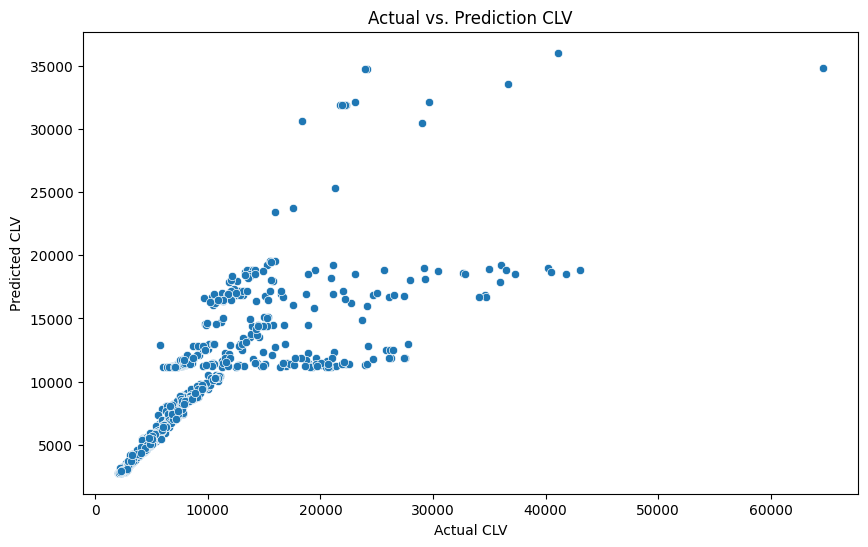

In [50]:
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x=y_test, y=y_pred_gb_test).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV');

Berdasarkan visualisasi diatas, perbandingan nilai CLV aktual dan prediksi memperlihatkan bahwa model cukup dapat memprediksi nilai CLV dengan baik terutama pada CLV yang bernilai rendah (<10000). Namun karena pada data ini terdapat banyak outlier maka pada nilai CLV yang termasuk outlier yaitu diatas USD 16624.75 memperlihatkan banyak error pada prediksi.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi nilai CLV, kita dapat mengeceknya melalui function feature_importances_.

In [51]:
features = list(transformer.transformers_[0][1].get_feature_names_out()) + transformer.transformers_[1][1].get_feature_names_out() + transformer.transformers_[2][1].get_feature_names_out() + ['Number of Policies', 'Monthly Premium Auto',
       'Total Claim Amount', 'Income']

In [52]:
df_importance = pd.DataFrame({
    'importance': (gb_tuned['model'].feature_importances_),
    '% importance': (gb_tuned['model'].feature_importances_)*100
},index=features).sort_values('importance', ascending=False)

df_importance

,importance,% importance
Number of Policies,6.578378e-01,65.783781
Monthly Premium Auto,3.262192e-01,32.621919
Income,7.958903e-03,0.795890
Total Claim Amount,2.803991e-03,0.280399
Marital Status_Married,2.523280e-03,0.252328
Vehicle Class_0,1.160145e-03,0.116015
Education,1.084811e-03,0.108481
Vehicle Class_1,1.080104e-04,0.010801
EmploymentStatus_2,9.456177e-05,0.009456
EmploymentStatus_0,9.060266e-05,0.009060


<AxesSubplot: >

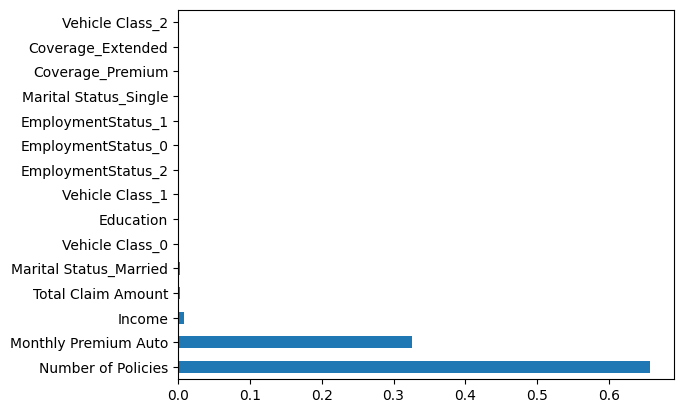

In [53]:
df_importance['importance'].plot(kind='barh')

Berdasarkan grafik diatas terlihat bahwa fitur Number of Policies dan Monthly Premium Auto adalah 2 fitur yang paling berpengaruh dalam model GradientBoosting kita atau dalam memprediksi nilai CLV menggunakan pemodelan yang telah dilakukan ini.

### **Conclusion**

1. Model final yang memiliki performa terbaik untuk memprediksi nilai CLV adalah GradientBoosting Regressor dengan akurasi sebesar 68.15 %. Artinya sebesar 68.15 % variabilitas dari nilai CLV dapat dijelaskan oleh model. Model dapat memprediksi nilai CLV dengan cukup akurat pada nilai CLV yang rendah (< 10000), namun untuk angka diatas itu terutama > 16624.75007525 (outlier) terdapat banyak error pada prediksi. 
2. Model memiliki limitasi pada range sebagai berikut: 
    - Fitur Number of Policies : 1 - 9.
    - Fitur Monthly Premium Auto : USD 61 - USD 297.
    - Fitur Income : USD 0 - USD 99934.0
    - Fitur Total Claim Amount : USD 0.42 - USD 2759.79.
2. Berdasarkan skor MAE, rata-rata error/kesalahan prediksi antara nilai CLV prediksi dan aktual adalah USD 1748.36. Artinya, model ini bisa saja memprediksi nilai CLV meleset sebesar USD 1748.36 dari nilai CLV yang sebenarnya. Nilai error ini cukup besar mengingat rata-rata nilai CLV adalah USD 8029.87. Sedangkan berdasarkan skor RMSE, rata-rata error antara nilai CLV prediksi dan aktual adalah USD 3609.38. Skor RMSE lebih tinggi karena metrics ini memberikan bobot yang lebih besar pada error dengan meng-kuadratkan nilai error sebelum dihitung rata-rata dan di-akar kuadrat-kan, dan juga karena RMSE lebih sensitif terhadap outlier dibandingkan MAE.
3. Berdasarkan feature of importances, Number of Policies dan Monthly Premium Auto adalah fitur yang paling berpengaruh terhadap model dalam memprediksi nilai CLV. Kedua fitur tersebut memberikan pengaruh diatas 98 % yang membuat fitur lain terlihat tidak signifikan. Dengan demikian kegiatan promosi yang diterapkan dapat difokuskan untuk penambahan jumlah polis dan jumlah premi yang dibayarkan tiap bulannya.
4. Dilihat dari nilai feature of importances, kita dapat mengetahui pengaruh karakteristik pelanggan terhadap nilai CLV meskipun nilai importances-nya tidak terlalu besar. Contohnya untuk fitur Marital Status, pelanggan yang berstatus Married berpotensi lebih besar terhadap nilai CLV, sehingga kita dapat membuat targeting promosi lebih berfokus pada pelanggan yang berstatus menikah. 


### **Recommendation**

Dari segi bisnis:

1. Bisnis akan lebih diuntungkan dengan banyaknya pelanggan loyal karena biaya mempertahankan pelanggan loyal akan lebih sedikit dibandingkan promosi kepada pelanggan baru. Untuk itu kita dapat memberikan sistem loyalty reward terhadap pelanggan yang memiliki spending dalam jumlah tertentu yang besar (nilai CLV tinggi). Loyalty reward ini biasanya diberikan dalam bentuk poin dan memiliki tingkatan rank tertentu. Nantinya poin ini dapat ditukar dengan berbagai benefit misalnya dalam bentuk barang yang menarik, atau diskon khusus dalam periode waktu tertentu agar pelanggan kembali dapat meningkatkan frekuensi pembelian dalam waktu yang lebih singkat. 
2. Sebagai fitur yang paling berpengaruh, marketing dapat difokuskan agar pelanggan menambah jumlah polis yang mereka miliki, yang nantinya berkontribusi pada penambahan jumlah premi yang dibayarkan. Perusahaan dapat melakukan teknik up-selling saat pelanggan akan melakukan renewal dengan menawarkan apakah pelanggan ingin menambah jumlah polis dengan harga yang lebih rendah atau menaikan layanan menjadi premium kepada pelanggan yang memiliki layanan basic dan menjelaskan bahwa dan value yang didapatkan lebih besar dari penambahan biaya premi.
3. Promosi untuk pelanggan dengan status menikah dapat difokuskan pada benefit untuk keluarga misalnya penambahan polis yang mencakup proteksi terhadap anak saat terjadi kecelakaan mobil.

Dari segi model:

1. Untuk meningkatkan performa model dapat dilakukan dengan menambah jumlah data agar model tidak cenderung overfitting dan nilai evaluation metrics yang dihasilkan semakin baik. 
2. Dapat dilakukan penambahan fitur yang berpengaruh terhadap nilai CLV misalnya sudah berapa lama menjadi pelanggan asuransi, informasi alamat, dan lainnya.
3. Untuk mengetahui pelanggan loyal atau tidak dapat dibuat pengembangan model klasifikasi dengan membagi nilai CLV tertentu menjadi 2 kelas yaitu pelanggan loyal dengan CLV tinggi dan tidak loyal dengan CLV rendah, atau juga dengan melakukan binning terhadap CLV.
4. Sebagai fitur yang paling berpengaruh, kita ingin melihat faktor apa saja yang berpengaruh terhadap besarnya jumlah premi yang dibayarkan pelanggan. Sehingga dapat dibuat pengembangan model dengan Monthly Premium Auto sebagai variabel dependen.

**References**

- https://www.aionlinecourse.com/tutorial/machine-learning/evaluating-regression-models-performance
- https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/
- https://deepchecks.com/what-is-data-cleaning/
- https://fourweekmba.com/customer-lifetime-value/
- https://www.frontierdigital.co.id/customer-lifetime-value-dan-cara-mengukurnya
- https://www.hashmicro.com/id/blog/mengapa-customer-retention-penting/
- https://www.iii.org/article/what-auto-insurance
- https://www.invespcro.com/blog/customer-acquisition-retention/
- https://www.investopedia.com/terms/a/auto-insurance.asp
- https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b


***

#### **Save Model**

In [54]:
# Save model
import pickle

estimator = Pipeline([('preprocessing', transformer), ('model', GradientBoostingRegressor())])
estimator.fit(x_trainval, y_trainval)

pickle.dump(estimator, open('Model_CLV_GB.sav', 'wb'))

In [55]:
# Load model
filename = 'Model_CLV_GB.sav'
loaded_model = pickle.load(open(filename, 'rb'))